In [1]:
# load libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
%matplotlib inline

(27455, 784)
(7172, 784)
The number of unique labels: 24
The unique labels are: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


<AxesSubplot:xlabel='label', ylabel='count'>

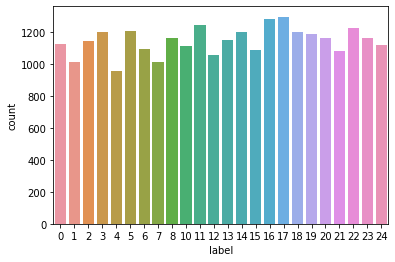

In [3]:

get_ipython().run_line_magic('matplotlib', 'inline')


# In[4]:


#Load the training data
with np.load('train_data_label.npz') as data:
    train_data = data['train_data']
    train_label = data['train_label']


# In[5]:


#Load the testing data
with np.load('test_data_label.npz') as data:
    test_data = data['test_data']
    test_label = data['test_label']


# In[6]:


#Checking the shape of the train and test data
print(train_data.shape)
print(test_data.shape)


# In[7]:


#Create dataframes from numpy array
df_train_data = pd.DataFrame(train_data)
df_train_label = pd.DataFrame(train_label)


# In[8]:


#Create dataframes from numpy array
df_test_data = pd.DataFrame(test_data)
df_test_label = pd.DataFrame(test_label)


# In[9]:


#Give proper names to columns 
df_train_data.head()
df_train_data.add_prefix('pixel_')


# In[10]:


#Give proper names to columns 
df_test_data.head()
df_test_data.add_prefix('pixel_')


# In[11]:


#Give proper column name : label
labels = df_train_label.rename(columns={0: 'label'})
labels.head()


# In[12]:


#View the unique labels
unique_lab = np.array(labels)
num_unique_lab =np.unique(unique_lab)
print("The number of unique labels:", len(num_unique_lab))
print("The unique labels are:", num_unique_lab)


# In[13]:


#Merging the two dataframes to one training dataset
df_train = pd.concat([df_train_data, labels], axis=1)
df_train.head()


# In[14]:


#Give proper column name : label
labels = df_test_label.rename(columns={0: 'label'})
labels.head()


# In[15]:


#Merging the two dataframes to one training dataset
df_test = pd.concat([df_test_data, labels], axis=1)
df_test.head()


# In[16]:


#Make a plot to check the quantities in each class
from matplotlib import pyplot as plt
sns.countplot(data = df_train, x = 'label')


# In[17]:


#Make a plot to check the quantities in each class
sns.countplot(data = df_test, x = 'label')


In [4]:
#Support Vector Machine code (SVM)
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

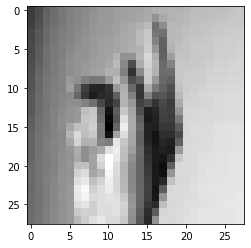

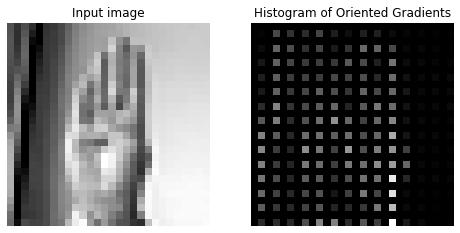

(1, 1764)
(21964, 784)
Variance explained by all 784 components = 100.00000000000011
Variance explained by first principal component = 35.362705453560494
Variance explained by first 2 principal component = 43.746764554751636
Variance explained by first 3 principal component = 50.62955179593469
Variance explained by first 10 principal component = 70.12879379657723
Variance explained by first 30 principal component = 83.82024132007164
Variance explained by first 60 principal component = 90.2775402513052
Variance explained by first 97 principal component = 93.95545688192377
Variance explained by first 100 principal component = 94.15912992087377
Variance explained by first 300 principal component = 99.09243665502167
(21964, 300)
(5491, 300)
(7172, 300)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       221
           1       1.00      0.99      1.00       188
           2       1.00      1.00      1.00       220
           3       0.98 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


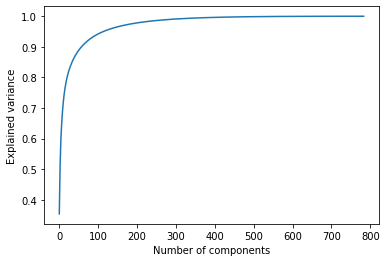

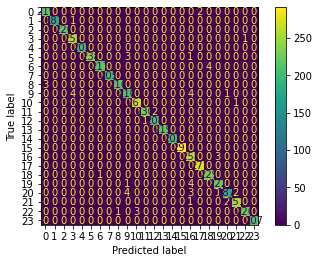

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


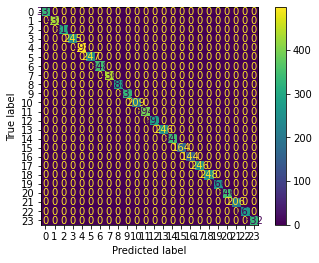

In [26]:

#Split the training data into training and validation set
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_train, random_state = 42, test_size = 0.2)


# In[20]:


x_train = train.iloc[0:21964, 0:784].values
y_train = train.iloc[0:21964, -1].values

x_val = val.iloc[0:5491, 0:784].values
y_val = val.iloc[0:5491, -1].values

x_test = df_test.iloc[0:7172, 0:784].values
y_test = df_test.iloc[0:7172, -1].values


# In[21]:


#Encode target labels with values between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)

label_enc = LabelEncoder()
y_test = label_enc.fit_transform(y_test)


# In[22]:


#normalizing pixel values (feature transformation)
#normalizing each pixel value to be in range (0-1)

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255


# In[23]:


#Below is shown a sample training image
index = 6
plt.imshow(x_train[index].reshape(28,28), cmap = 'gray')
plt.show


# In[24]:


#Below is shown a sample test image
index = 6
plt.imshow(x_test[index].reshape(28,28), cmap = 'gray')
plt.show


# In[25]:





# In[26]:


#Trying HOG features (Feature)

from skimage.feature import hog
from skimage import data,exposure
import cv2
def get_hog(image):
    fd,hog_image=hog(image.reshape(28,28),pixels_per_cell=(2,2),
                        cells_per_block=(1, 1),visualize=True,feature_vector=False)
    return(fd,hog_image)

def show_hog(image,hog_image):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    ax1.set_title('Input image')
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
    
#Code from: https://www.kaggle.com/code/pranavnivarthi/sign-language-letter-detection/notebook


# In[27]:


a,b=get_hog(x_train[18])
show_hog(x_train[18],b)
a=a.reshape(-1)
a=a.reshape(1,len(a))
print(a.shape)


# In[28]:


#Principal Component Analysis (Feature Selection)
from sklearn.preprocessing import StandardScaler

#create object
scaler = StandardScaler()

#calculate mean and standard deviation
scaler.fit(x_train)
scaler.fit(x_val)
scaler.fit(x_test)

#transform the values
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)



from sklearn.decomposition import PCA

pca_784 = PCA(n_components = 784)
pca_784.fit(x_train)
X_pca_784 = pca_784.transform(x_train)
print(X_pca_784.shape)


# In[30]:


#The variance explained by all components should be 100%
print("Variance explained by all 784 components =",
     sum(pca_784.explained_variance_ratio_*100))


# In[31]:


plt.plot(np.cumsum(pca_784.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")


# In[32]:


print("Variance explained by first principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[0])
print("Variance explained by first 2 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[1])
print("Variance explained by first 3 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[2])
print("Variance explained by first 10 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[9])
print("Variance explained by first 30 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[29])
print("Variance explained by first 60 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[59])
print("Variance explained by first 97 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[96])
print("Variance explained by first 100 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[99])
print("Variance explained by first 300 principal component =",
     np.cumsum(pca_784.explained_variance_ratio_*100)[299])


# In[33]:


#Apply PCA to the dataset with n_components = 300
#This selects the 300 components preserving the 99% of the variance
pca = PCA(n_components = 300)


# In[34]:


x_train = pca.fit_transform(x_train)
x_val = pca.transform(x_val)
x_test = pca.transform(x_test)


# In[35]:


#check the new reduced shape of the datasets
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


# In[36]:


#Support Vector Machine code (SVM)

#Train the basic model on train set
model = SVC(random_state = 42)
model.fit(x_train, y_train)


# In[37]:


#Parameter tuning
#Train the basic model on validation set
model = SVC()
model.fit(x_val, y_val)

#print the accuracyscore
val_pred = model.predict(x_val)
accuracy_score(y_val, val_pred)


#Printing the model results on the validation set
print(classification_report(y_val, val_pred))


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,  x_val, y_val)

plt.show()


# In[38]:


##Building aloop instead of testing all posible lines. GridSearch finds the best hyperparameters for the model

#optimal_params = GridSearchCV(svm.SVC(),{
   # "C": [0.5, 1, 10, 100], #These values must be greater than zero
   # "gamma": ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
   # "kernel":["rbf", "poly", "sigmoid"] #typically the radial basis function shows the best performance. But we try two more to be sure 
#}, cv=5, scoring = 'accuracy')

##Printing with parameters fit the model the best
#optimal_params.fit(x_val, y_val)
#print(optimal_params.best_params_)
#optimal_params.fit(x_train, y_train)
#print(optimal_params.best_params_)

##Optimal parameters
##{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

##Code from: https://statquest.gumroad.com/l/iulnea


# In[40]:


#Buidling model with best parameters to improve accuracy score
model = SVC(random_state=42, C=100, gamma=0.001)


# In[41]:


#Checking the model on the validation data
model.fit(x_val, y_val)
val_pred = model.predict(x_val)
accuracy_score(y_val, val_pred)


# In[42]:


#Checking the model on the test data
model.fit(x_test, y_test)
#Print the accuracyscore
test_pred = model.predict(x_test)
accuracy_score(y_test, test_pred)


# In[43]:


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,  x_test, y_test)

plt.show()
#Code from: https://statquest.gumroad.com/l/iulnea

In [29]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
data = np.load('test_images_task2.npy')

i1 = data[0]
i1 = i1.astype("int")
df_train_data = pd.DataFrame(i1)

#Give proper names to columns 
df_train_data.add_prefix('pixel_')

i1 = df_train_data.values
mode, count = stats.mode(i1, axis = 0)
condition = (mode == 200)
index = np.where(np.any(condition == True, axis=0))[0]    # find the index of the 200
index.shape
i2 = np.delete(i1, index, axis=1)   # delete all the 200
i2.shape
n_pic = int(i2.shape[1]/28)   # the number of pics in one original image
i3 = np.array(np.hsplit(i2, n_pic))    #split the long image into n_pic images
i4 = i3[0]
i5 = i4.reshape(1,784)
print(i5.shape)

#create object
scaler = StandardScaler()

#calculate mean and standard deviation
scaler.fit(i5)

i5 = i5 / 255

pca = PCA(n_components = 300)
i5 = pca.fit_transform(i5)


model.predict(i5)


(1, 784)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


ValueError: X has 1 features, but SVC is expecting 300 features as input.

In [11]:
model.predict(i4)

ValueError: X has 28 features, but SVC is expecting 300 features as input.